 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().mean() *100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df['Date'] = pd.to_datetime(sp500_history_df["Date"], dayfirst = True)
sp500_history_df.set_index(sp500_history_df['Date'], inplace=True)
sp500_history_df.drop(columns=['Date'],inplace=True)
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']
sp500_history_df = sp500_history_df.sort_values("Date", ascending=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype

dtype('float64')

In [11]:
# Calculate Daily Returns
sp500_history_df.isnull().sum()
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns_df.pct_change
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P500"})
sp500_returns_df.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
combined_portfolios_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df], axis='columns', join='inner')
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

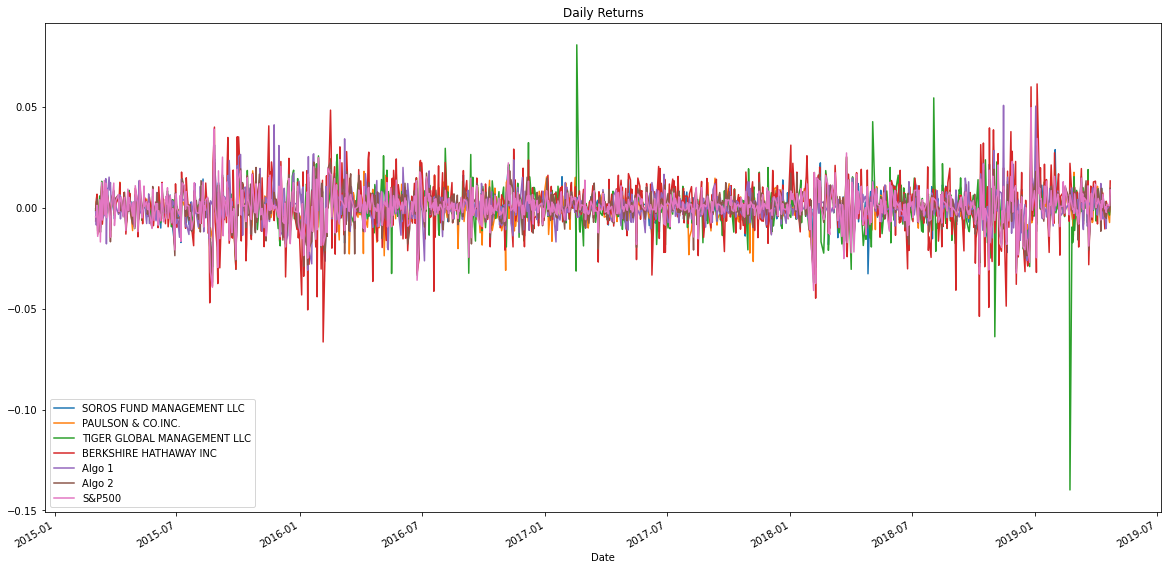

In [15]:
# Plot daily returns
combined_portfolios_df.plot( title="Daily Returns" , figsize=(20,10))

<AxesSubplot:xlabel='Date'>

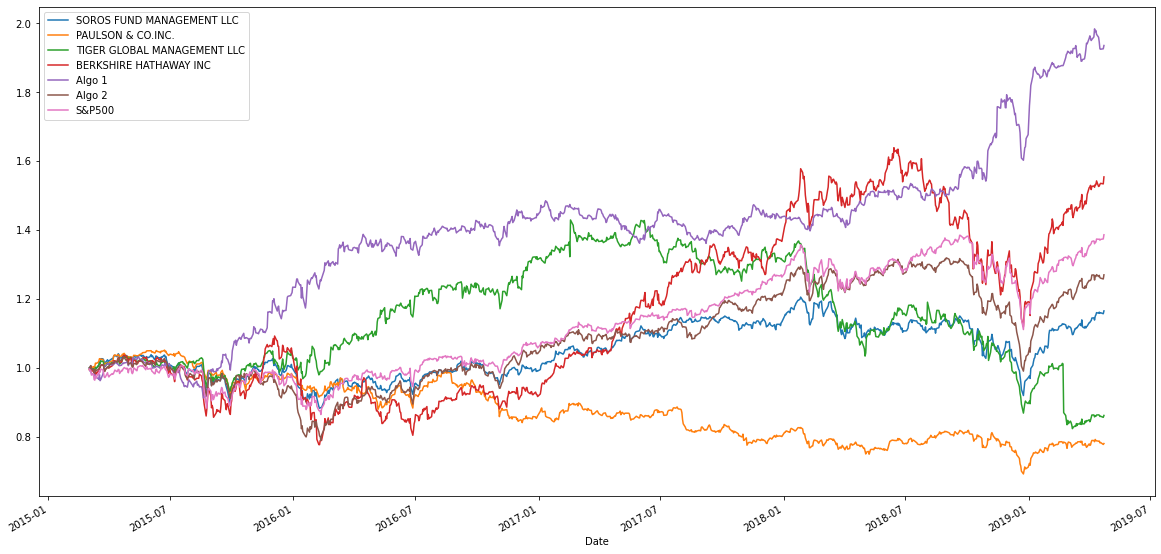

In [16]:
# Plot cumulative returns
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Portfolio Risk'}>

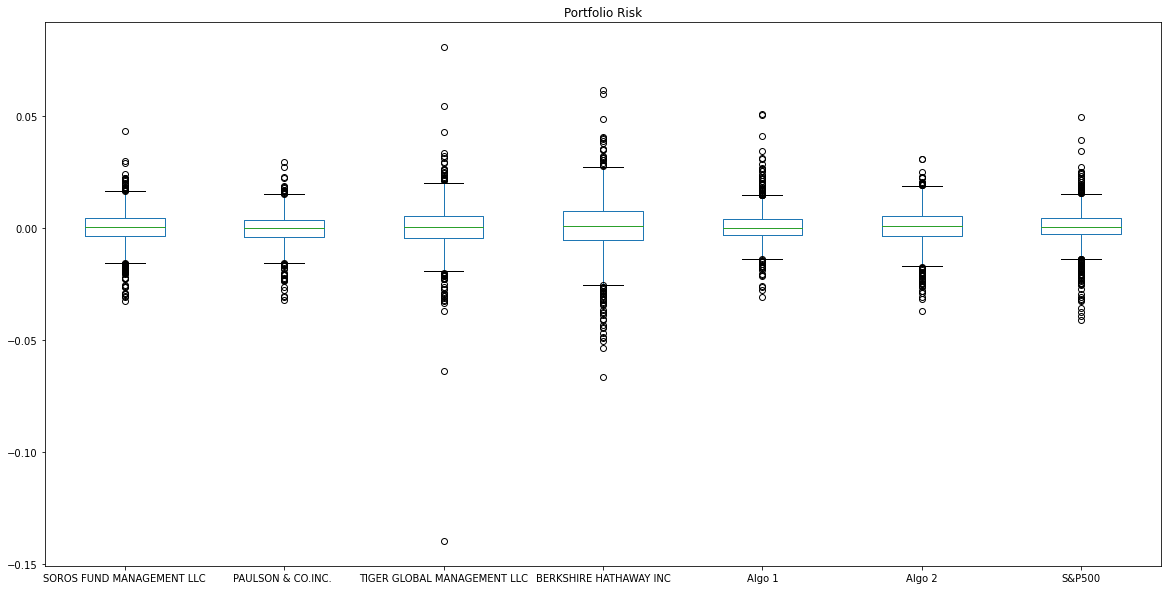

In [17]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

In [18]:
# Daily Standard Deviations
daily_std = combined_portfolios_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_SP500 =[daily_std > daily_std['S&P500']]
portfolios_riskier_than_SP500

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 S&P500                         False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

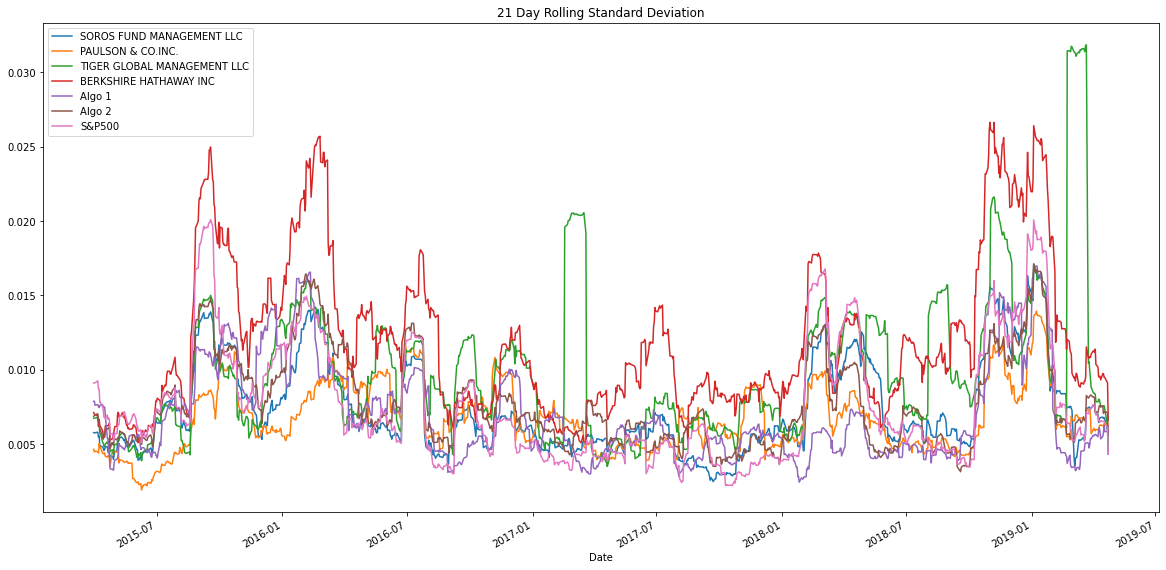

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_portfolios_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

In [22]:
# Construct a correlation table
correlation = combined_portfolios_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

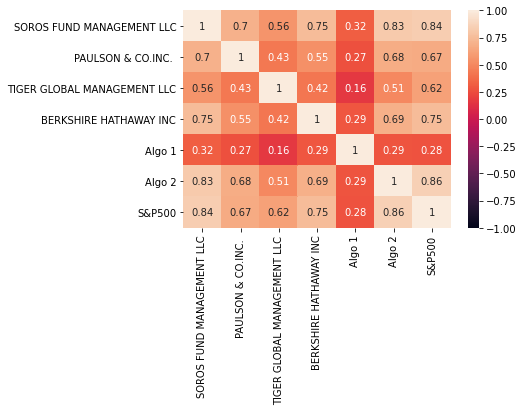

In [23]:
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

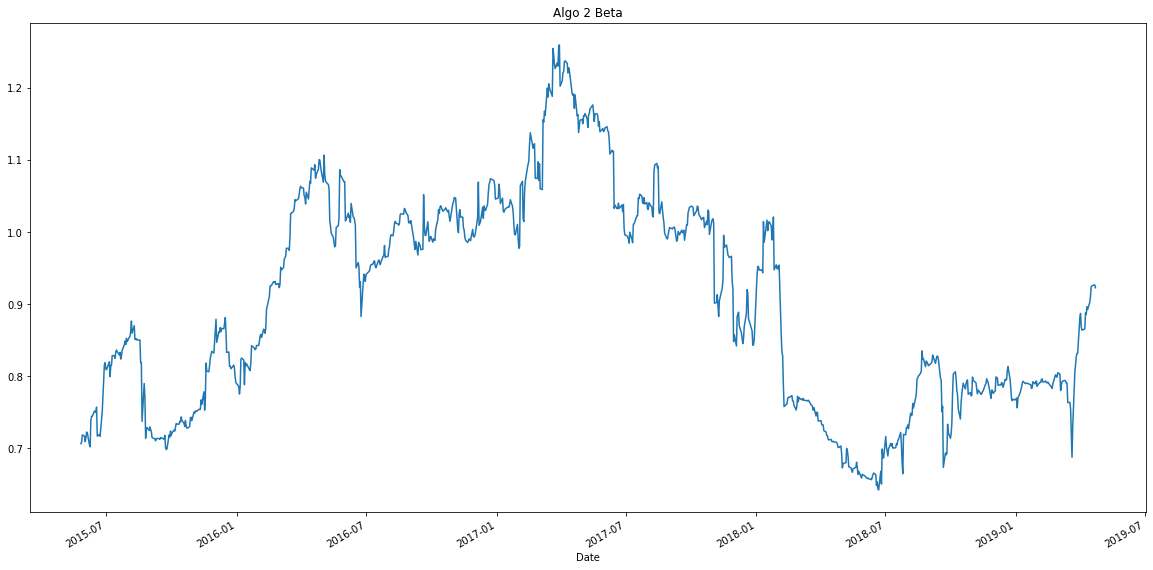

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# Calculate covariance of all daily returns vs. S&P 500
algo_2_covariance = combined_portfolios_df['Algo 2'].rolling(window=60).cov(combined_portfolios_df['S&P500'])
algo_2_covariance
# Calculate variance of all daily returns vs. S&P 500
variance = combined_portfolios_df['S&P500'].rolling(window=60).var()
variance
# Calculate beta of all daily returns 
algo_2_beta = algo_2_covariance / variance
algo_2_beta_plot = algo_2_beta.plot(title="Algo 2 Beta", figsize=(20, 10))

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

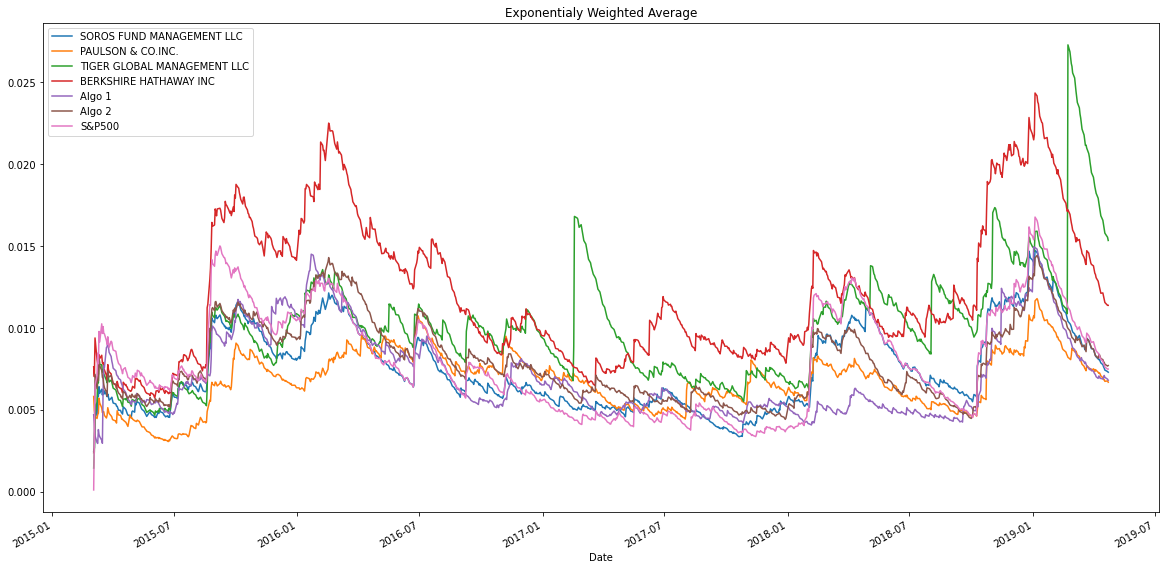

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
#rolling_window_ewma = combined_portfolios_df.rolling(window=100).mean().plot(figsize=(20, 10))
rolling_window_ewma = combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

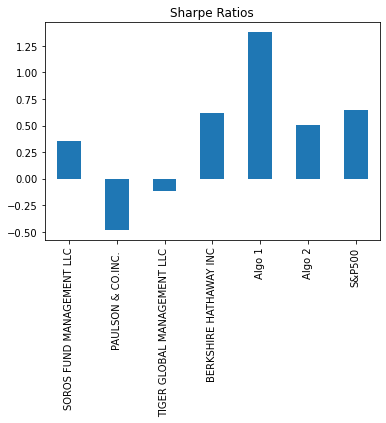

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
amd_history_csv = Path("Resources/amd.csv")
amd_history_df = pd.read_csv(amd_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
amd_history_df.head()

,Close
Date,
2015-03-02,3.21
2015-03-03,3.14
2015-03-04,3.05
2015-03-05,2.98
2015-03-06,2.92


In [29]:
# Read the second stock
netflix_history_csv = Path("Resources/netflix.csv")
netflix_history_df = pd.read_csv(netflix_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
netflix_history_df.head()

,Close
Date,
2015-03-02,68.61
2015-03-03,67.82
2015-03-04,67.11
2015-03-05,66.81
2015-03-06,64.87


In [30]:
# Read the third stock
nvidia_history_csv = Path("Resources/nvidia.csv")
nvidia_history_df = pd.read_csv(nvidia_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
nvidia_history_df.head()

,Close
Date,
2015-03-02,22.60
2015-03-03,22.18
2015-03-04,22.43
2015-03-05,22.86
2015-03-06,22.55


In [31]:
# Concatenate all stocks into a single DataFrame
my_portfolio_combined_df = pd.concat([amd_history_df, netflix_history_df, nvidia_history_df], axis="columns", join="inner")
my_portfolio_combined_df
# Sort datetime index in ascending order (past to present)
my_portfolio_combined_df.sort_index(inplace=True)
# Set column names
my_portfolio_combined_df.columns = ['AMD', 'NFLX', 'NVDA']
# Display a few rows
my_portfolio_combined_df.head()

,AMD,NFLX,NVDA
Date,,,
2015-03-02,3.21,68.61,22.60
2015-03-03,3.14,67.82,22.18
2015-03-04,3.05,67.11,22.43
2015-03-05,2.98,66.81,22.86
2015-03-06,2.92,64.87,22.55


In [32]:
# Drop Nulls
my_portfolio_combined_df.dropna()
my_portfolio_combined_df
my_portfolio_combined_returns = my_portfolio_combined_df.pct_change()
my_portfolio_combined_returns.dropna(inplace=True)
my_portfolio_combined_returns.head()

,AMD,NFLX,NVDA
Date,,,
2015-03-03,-0.021807,-0.011514,-0.018584
2015-03-04,-0.028662,-0.010469,0.011271
2015-03-05,-0.022951,-0.004470,0.019171
2015-03-06,-0.020134,-0.029038,-0.013561
2015-03-07,0.003425,-0.018653,0.002661


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_portfolio_weighted_returns = my_portfolio_combined_returns.dot(weights)
my_portfolio_weighted_returns.head()
my_portfolio_weighted_returns = my_portfolio_weighted_returns.rename("Custom")
my_portfolio_weighted_returns.head()

Date
2015-03-03   -0.017302
2015-03-04   -0.009287
2015-03-05   -0.002750
2015-03-06   -0.020911
2015-03-07   -0.004189
Name: Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_portfolios_2_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df, my_portfolio_weighted_returns], axis='columns', join='inner')
combined_portfolios_2_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.017302
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.009287
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.002750
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.020911
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.006956


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

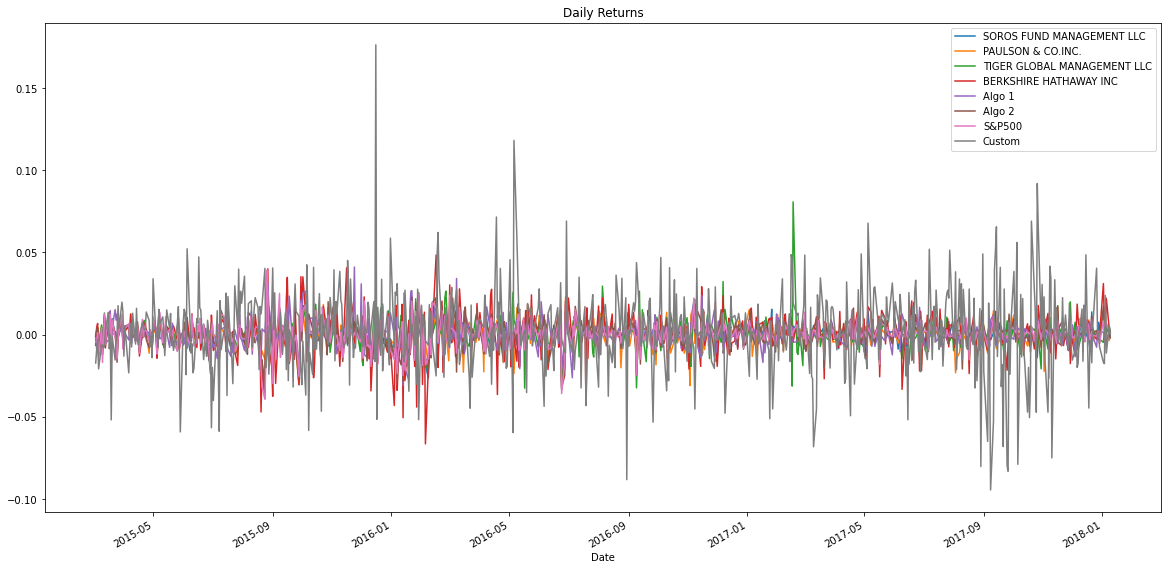

In [35]:
# Plot daily returns
combined_portfolios_2_df.plot( title="Daily Returns" , figsize=(20,10))

<AxesSubplot:xlabel='Date'>

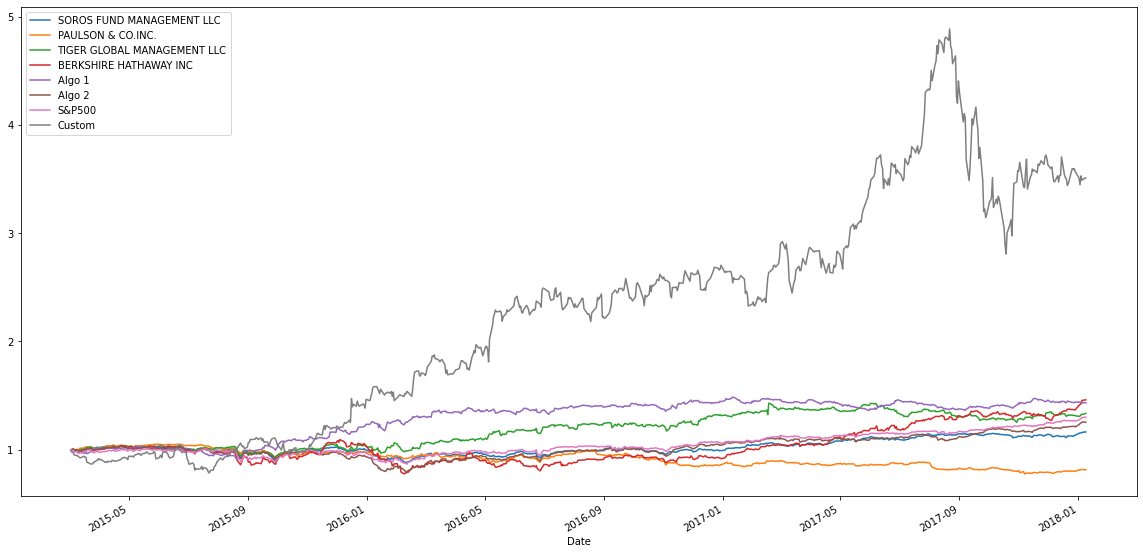

In [36]:
# Plot cumulative returns
combined_portfolios_2_df_cumulative_returns = (1 + combined_portfolios_2_df).cumprod()
combined_portfolios_2_df_cumulative_returns.head()
combined_portfolios_2_df_cumulative_returns.plot(figsize=(20,10))

<AxesSubplot:title={'center':'Portfolio Risk'}>

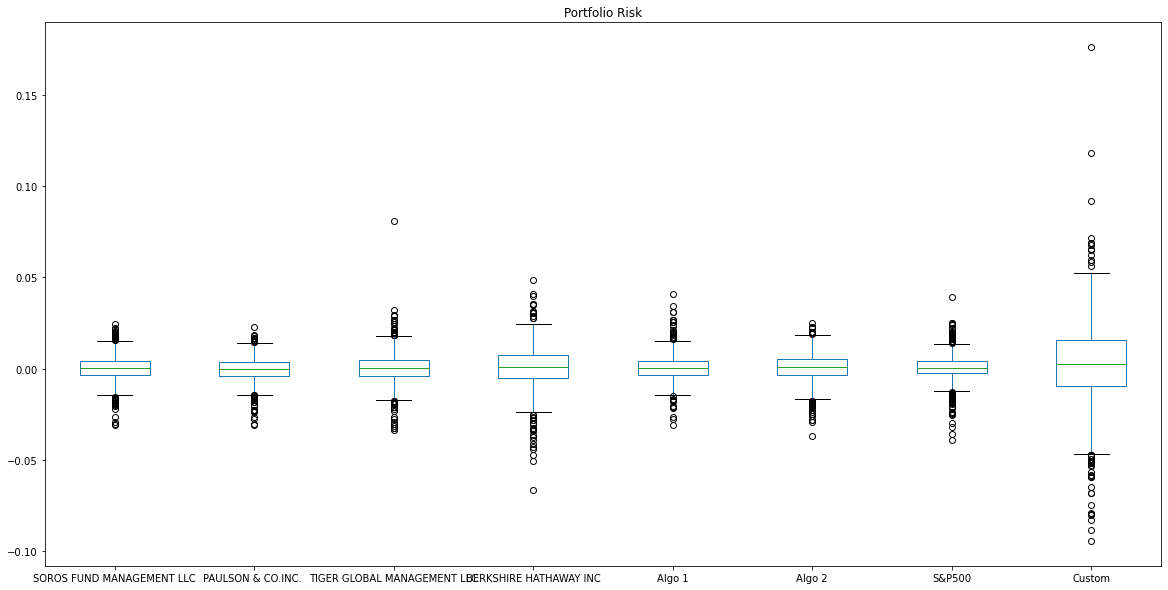

In [37]:
# Box plot to visually show risk
combined_portfolios_2_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

In [38]:
# Risk
combined_portfolios_2_df_daily_std = combined_portfolios_2_df.std().sort_values(ascending=False)
combined_portfolios_2_df_daily_std

Custom                         0.024793
BERKSHIRE HATHAWAY INC         0.012002
TIGER GLOBAL MANAGEMENT LLC    0.009062
Algo 2                         0.008094
S&P500                         0.007691
Algo 1                         0.007576
SOROS FUND MANAGEMENT LLC      0.007039
PAULSON & CO.INC.              0.006837
dtype: float64

In [39]:
# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_2_SP500 = [combined_portfolios_2_df_daily_std > combined_portfolios_2_df_daily_std['S&P500']]
portfolios_riskier_than_2_SP500
#portfolios_riskier_than_SP500 =[daily_std > daily_std['S&P500']]
#portfolios_riskier_than_SP500

[Custom                          True
 BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 S&P500                         False
 Algo 1                         False
 SOROS FUND MANAGEMENT LLC      False
 PAULSON & CO.INC.              False
 dtype: bool]

In [40]:
# Calculate the annualized standard deviation (252 trading days)
combined_portfolios_2_df_annualized_std = combined_portfolios_2_df_daily_std *np.sqrt(252)
combined_portfolios_2_df_annualized_std.sort_values(ascending=False)

Custom                         0.393578
BERKSHIRE HATHAWAY INC         0.190520
TIGER GLOBAL MANAGEMENT LLC    0.143856
Algo 2                         0.128496
S&P500                         0.122083
Algo 1                         0.120261
SOROS FUND MANAGEMENT LLC      0.111737
PAULSON & CO.INC.              0.108528
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

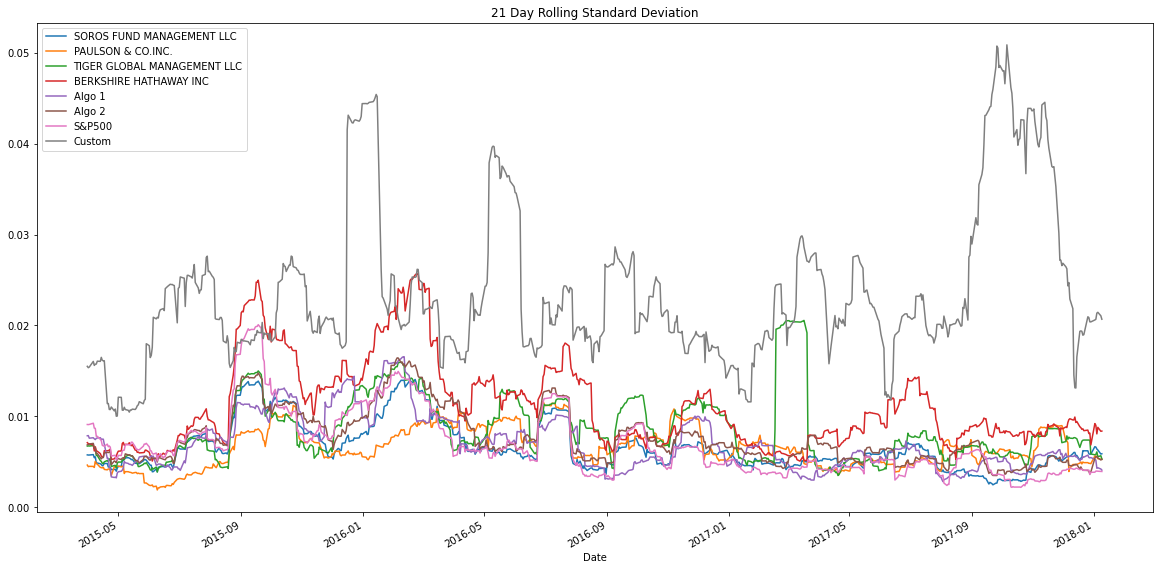

In [41]:
# Rolling
combined_portfolios_2_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

In [42]:
# Annualized Sharpe Ratios
combined_portfolios_2_df_sharpe_ratios = (combined_portfolios_2_df.mean() * 252) / (combined_portfolios_2_df.std() * np.sqrt(252))
combined_portfolios_2_df_sharpe_ratios.sort_values(ascending=False)

Custom                         1.310987
Algo 1                         1.104137
S&P500                         0.810956
BERKSHIRE HATHAWAY INC         0.789595
TIGER GLOBAL MANAGEMENT LLC    0.770600
Algo 2                         0.675715
SOROS FUND MANAGEMENT LLC      0.525853
PAULSON & CO.INC.             -0.609075
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

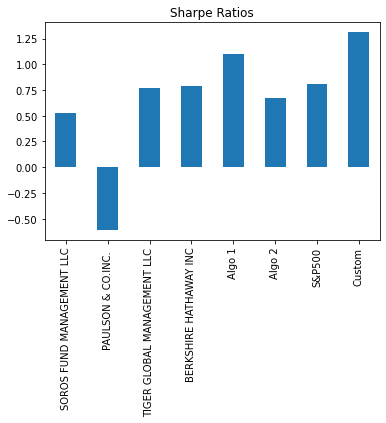

In [43]:
# Visualize the sharpe ratios as a bar plot
combined_portfolios_2_df_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [44]:
# Create a correlation analysis
combined_portfolios_2_df_correlation = combined_portfolios_2_df.corr()
combined_portfolios_2_df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.655176,0.595258,0.725013,0.320197,0.824629,0.828206,0.016249
PAULSON & CO.INC.,0.655176,1.000000,0.371562,0.475137,0.231884,0.610084,0.596839,0.000788
TIGER GLOBAL MANAGEMENT LLC,0.595258,0.371562,1.000000,0.459217,0.187837,0.535133,0.682841,-0.007011
BERKSHIRE HATHAWAY INC,0.725013,0.475137,0.459217,1.000000,0.278017,0.625857,0.684568,0.017229
Algo 1,0.320197,0.231884,0.187837,0.278017,1.000000,0.261128,0.281698,0.074113
Algo 2,0.824629,0.610084,0.535133,0.625857,0.261128,1.000000,0.846730,0.002517
S&P500,0.828206,0.596839,0.682841,0.684568,0.281698,0.846730,1.000000,0.011659
Custom,0.016249,0.000788,-0.007011,0.017229,0.074113,0.002517,0.011659,1.000000


<AxesSubplot:>

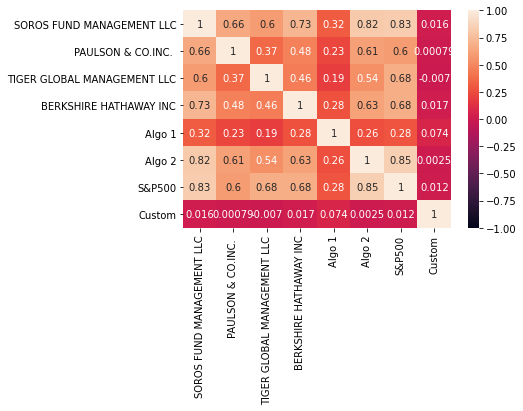

In [45]:
sns.heatmap(combined_portfolios_2_df_correlation,  vmin=-1, vmax=1,annot=True)

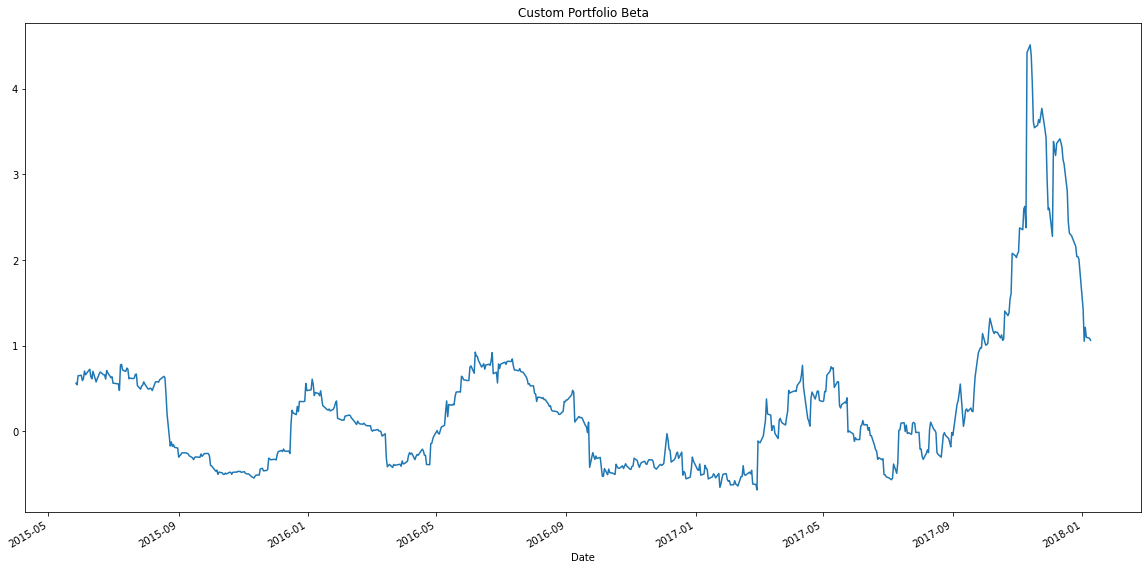

In [46]:
# Beta
custom_covariance = combined_portfolios_2_df['Custom'].rolling(window=60).cov(combined_portfolios_2_df['S&P500'])
custom_covariance
# Calculate variance of all daily returns vs. S&P 500
variance_2 = combined_portfolios_2_df['S&P500'].rolling(window=60).var()
variance_2
# Calculate beta of all daily returns 
custom_beta = custom_covariance / variance_2
custom_beta_plot = custom_beta.plot(title="Custom Portfolio Beta", figsize=(20, 10))

# Custom Portfolio
+ Has the highest annualized standard deviation of all the portfolios being analyzed, which we can see not only by the numbers but we can see better pictured in the 21 day rolling standard deviation plot. 
+ Has also the highest sharpe ratio followed by the Algo_1 porfolio. 
+ This indicates that we were able to choose a portfolio that performed better thaan the Algorithmic ones chosen by Harold. 
+ We can see that our custom porfolio is closest correlated to Algo_1 portfolio and the farthest correlated in fact the only negative correlation to Tiger Global Management portfolio.